In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4

**On making the selection of cases within a specific Article:**

Number of cases with '6' appearing at least once in conclusion:

In [ ]:
from datasets import load_dataset

# Load the dataset
ds = load_dataset("glnmario/ECHR")

# Initialize a counter
count = 0

# Iterate through the dataset
for case in ds['train']:
    if 'conclusion' in case and '6' in case['conclusion']:
        count += 1

print(f"Number of cases with '6' in the conclusion: {count}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/11478 [00:00<?, ? examples/s]

Number of cases with '6' in the conclusion: 3766


Number of cases with variants of 'Article 6' appearing at least once in conclusion:

In [ ]:
import re

# Compile a regex pattern to match various instances of 'article 6'
pattern = re.compile(r'\b(?:article|art|articles|arts|Articles|Arts)\.? ?6\b', re.IGNORECASE)

# Initialize a counter
count = 0

# Iterate through the dataset
for case in ds['train']:
    if 'conclusion' in case and pattern.search(case['conclusion']):
        count += 1

print(f"Number of cases with various forms of 'article 6' in the conclusion: {count}")

Number of cases with various forms of 'article 6' in the conclusion: 3716


Text files of those that appear in '6' code, but are excluded in 'Article 6 variants' code

In [ ]:
# Compile a regex pattern to match various instances of 'article 6'
pattern = re.compile(r'\b(?:article|art|articles|arts|Articles|Arts)\.? ?6\b', re.IGNORECASE)

# Initialize a set to hold the texts of relevant conclusions
conclusions_in_code1 = set()
conclusions_in_code2 = set()

# Collect conclusions from Code 1
for case in ds['train']:
    if 'conclusion' in case and '6' in case['conclusion']:
        conclusions_in_code1.add(case['conclusion'])

# Collect conclusions from Code 2
for case in ds['train']:
    if 'conclusion' in case and pattern.search(case['conclusion']):
        conclusions_in_code2.add(case['conclusion'])

# Find differences - cases in Code 1 but not in Code 2
unique_to_code_1 = conclusions_in_code1 - conclusions_in_code2

# Print the conclusions
print("Conclusions included in Code 1 but excluded in Code 2:")
for conclusion in unique_to_code_1:
    print(conclusion)

Conclusions included in Code 1 but excluded in Code 2:
Preliminary objection joined to merits and dismissed (Article 35-3 - Ratione materiae);Remainder inadmissible;Violation of Article 7 - No punishment without law (Article 7-1 - Heavier penalty;Nulla poena sine lege;Retroactivity);Violation of Article 5 - Right to liberty and security (Article 5-1 - Lawful arrest or detention);Respondent State to take individual measures (Article 46-2 - Individual measures);Non-pecuniary damage - award
No violation of Art. 8;Violation of Art. 14+8 with regard to right of access;Violation of Art. 14+8 with regard to right of appeal;Not necessary to examine Art. 14+6;Non-pecuniary damage - financial award;Costs and expenses partial award - domestic proceedings
Preliminary objection dismissed (Article 35-1 - Six month period);Remainder inadmissible;Violation of Article 2 - Right to life (Substantive aspect);Violation of Article 2 - Right to life (Article 2-1 - Effective investigation) (Procedural aspect

**Gender identification following a simple code:**

Number of male/female/other applicants in Article 6 based on 'he' and 'she' appearing in the first 5 sentences:

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Convert all splits to pandas DataFrames and concatenate them
df_list = [pd.DataFrame(ds[split]) for split in ds.keys()]
df = pd.concat(df_list, ignore_index=True)

# Function to extract the first five sentences
def extract_first_five_sentences(text):
    sentences = re.split(r'(?<=[.!?]) +', text)
    return ' '.join(sentences[:5])

# Function to identify gender from text
def identify_gender(text):
    text = extract_first_five_sentences(text)

    # Check for male indicators
    if 'He ' in text or ' he ' in text:
        return 'male'

    # Check for female indicators
    if 'She ' in text or ' she ' in text:
        return 'female'

    return 'other'

# Regex pattern to identify all variants of "Article 6" using non-capturing groups
pattern = re.compile(r'\b(?:Article 6|article 6|Art\. 6|Art\.6|art\.6|art\. 6|Arts\.6|arts\.6|Arts\. 6|arts\. 6|Articles 6|articles 6)\b', re.IGNORECASE)

# Filter the cases based on all variants of "Article 6" in the conclusion
cases = df[df['conclusion'].str.contains(pattern, na=False)]

# Apply the gender identification function
df['gender'] = df['text'].apply(identify_gender)

# Filter the cases based on all variants of "Article 6" in the conclusion
cases = df[df['conclusion'].str.contains(pattern, na=False)]

# Count violations and non-violations based on gender
gender_violation_counts = cases.groupby(['gender', 'binary_judgement']).size().unstack(fill_value=0)

# Extract totals for each gender and violation status
male_violations = gender_violation_counts.at['male', 1] if 'male' in gender_violation_counts.index and 1 in gender_violation_counts.columns else 0
male_non_violations = gender_violation_counts.at['male', 0] if 'male' in gender_violation_counts.index and 0 in gender_violation_counts.columns else 0
female_violations = gender_violation_counts.at['female', 1] if 'female' in gender_violation_counts.index and 1 in gender_violation_counts.columns else 0
female_non_violations = gender_violation_counts.at['female', 0] if 'female' in gender_violation_counts.index and 0 in gender_violation_counts.columns else 0

# Total counts for males, females, and others
male_count = gender_violation_counts.loc['male'].sum() if 'male' in gender_violation_counts.index else 0
female_count = gender_violation_counts.loc['female'].sum() if 'female' in gender_violation_counts.index else 0
other_count = len(art_6_cases) - (male_count + female_count)

print(f"Total Male Applicants in Article 6 cases: {male_count}")
print(f"Total Female Applicants in Article 6 cases: {female_count}")
print(f"Total Other Applicants in Article 6 cases: {other_count}")

NameError: name 'art_6_cases' is not defined

Number of male/female violations and significance:

In [ ]:
# Create a contingency table for the Chi-Square test
contingency_table = [
    [male_violations, female_violations],
    [male_non_violations, female_non_violations]
]

# Perform the Chi-Square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculate percentages
male_violations_percentage = (male_violations / male_count) * 100 if male_count > 0 else 0
male_non_violations_percentage = (male_non_violations / male_count) * 100 if male_count > 0 else 0
female_violations_percentage = (female_violations / female_count) * 100 if female_count > 0 else 0
female_non_violations_percentage = (female_non_violations / female_count) * 100 if female_count > 0 else 0

# Display the counts, percentages, and Chi-Square test results
print("Number of Violations and Non-Violations in Article 6 Cases based on gender:")
print(f"Male Violations: {male_violations} ({male_violations_percentage:.2f}%)")
print(f"Male Non-Violations: {male_non_violations} ({male_non_violations_percentage:.2f}%)")
print(f"Female Violations: {female_violations} ({female_violations_percentage:.2f}%)")
print(f"Female Non-Violations: {female_non_violations} ({female_non_violations_percentage:.2f}%)")

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("There is a significant difference between male and female violation/non-violation rates.")
else:
    print("There is no significant difference between male and female violation/non-violation rates.")

Number of Violations and Non-Violations in Article 6 Cases based on gender:
Male Violations: 808 (82.36%)
Male Non-Violations: 173 (17.64%)
Female Violations: 206 (82.73%)
Female Non-Violations: 43 (17.27%)

Chi-Square Test Results:
Chi-Square Statistic: 0.0017895896417037885
P-Value: 0.966256721934515
There is no significant difference between male and female violation/non-violation rates.


**On Random Forest and SVM:**

**Random Forest method:** (Classifying the gender of the applicant as male, female or unknown. Classification is based on the first 10 sentences of the text column and the frequency of the indicators for the gender.)

Counting the number of violation/non-violation for the male/female cases based on the binary judgement column. Note: Code 1 uses manually labeled gender to count violations and non-violations based on the binary-judgement column.

In [ ]:
import pandas as pd
from datasets import load_dataset
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the ECHR dataset
dataset = load_dataset("glnmario/ECHR")

# Convert all splits to pandas DataFrames and concatenate them
df_list = [pd.DataFrame(dataset[split]) for split in dataset.keys()]
df = pd.concat(df_list, ignore_index=True)

# Define the regex pattern for variations of Article 6
pattern = re.compile(r'\b(?:article|art|articles|arts|Articles|Arts)\.? ?6\b', re.IGNORECASE)

# Filter rows where the relevant column contains variations of 'Art. 6'
art_6_cases = df[df['conclusion'].str.contains(pattern, na=False)]

# Extract the first 10 sentences for gender labeling
def extract_relevant_text(text):
    sentences = text.split('.')
    first_10_sentences = sentences[:10]
    text_to_analyze = '. '.join([sentence.strip() for sentence in first_10_sentences if sentence.strip()])
    return text_to_analyze

# Apply the function to extract relevant text
art_6_cases['relevant_text'] = art_6_cases['text'].apply(extract_relevant_text)

# Drop rows with empty 'relevant_text'
art_6_cases = art_6_cases[art_6_cases['relevant_text'].str.strip().astype(bool)]

# Enhanced heuristic for labeling gender based on term frequency of pronouns and titles
def label_gender(text):
    text = text.lower()
    female_indicators = [' she ', ' her ', ' mrs. ', ' ms. ']
    male_indicators = [' he ', ' his ', ' him ', ' mr. ']

    female_count = sum(text.count(indicator) for indicator in female_indicators)
    male_count = sum(text.count(indicator) for indicator in male_indicators)

    if male_count > female_count:
        return 'Male'
    elif female_count > male_count:
        return 'Female'
    else:
        return 'Unknown'

# Apply the heuristic to create labels
art_6_cases['gender'] = art_6_cases['relevant_text'].apply(label_gender)

# Extract features and labels
X = art_6_cases['relevant_text']
y = art_6_cases['gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_tfidf)

# Print classification report
print(classification_report(y_test, y_pred))

# Predict the gender of applicants in the original Art. 6 cases
art_6_cases['gender_prediction'] = rf_classifier.predict(tfidf_vectorizer.transform(art_6_cases['relevant_text']))

# Count and display gender prediction distribution
gender_distribution = art_6_cases['gender_prediction'].value_counts()
print("Gender Distribution of Applicants in Article 6 Cases:")
print(gender_distribution)

# Count the number of violations and non-violations for male and female
def classify_violation(binary_judgement):
    return 'Violation' if binary_judgement == 1 else 'Non-violation'

# Apply the function to classify violations
art_6_cases['violation_status'] = art_6_cases['binary_judgement'].apply(classify_violation)

# Count violations and non-violations for each gender
violation_counts = art_6_cases.groupby(['gender_prediction', 'violation_status']).size().unstack(fill_value=0)
print("\nNumber of Violations and Non-violations for Male and Female Applicants in Article 6 Cases:")
print(violation_counts)


<ipython-input-7-7da9866e2e94>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_6_cases['relevant_text'] = art_6_cases['text'].apply(extract_relevant_text)


              precision    recall  f1-score   support

      Female       0.99      0.63      0.77       123
        Male       0.82      0.96      0.88       379
     Unknown       0.88      0.81      0.84       242

    accuracy                           0.85       744
   macro avg       0.90      0.80      0.83       744
weighted avg       0.87      0.85      0.85       744

Gender Distribution of Applicants in Article 6 Cases:
gender_prediction
Male       1992
Unknown    1207
Female      517
Name: count, dtype: int64

Number of Violations and Non-violations for Male and Female Applicants in Article 6 Cases:
violation_status   Non-violation  Violation
gender_prediction                          
Female                        69        448
Male                         287       1705
Unknown                      127       1080


<ipython-input-8-4ed4a7bc2de1>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_6_cases['relevant_text'] = art_6_cases['text'].apply(extract_relevant_text)


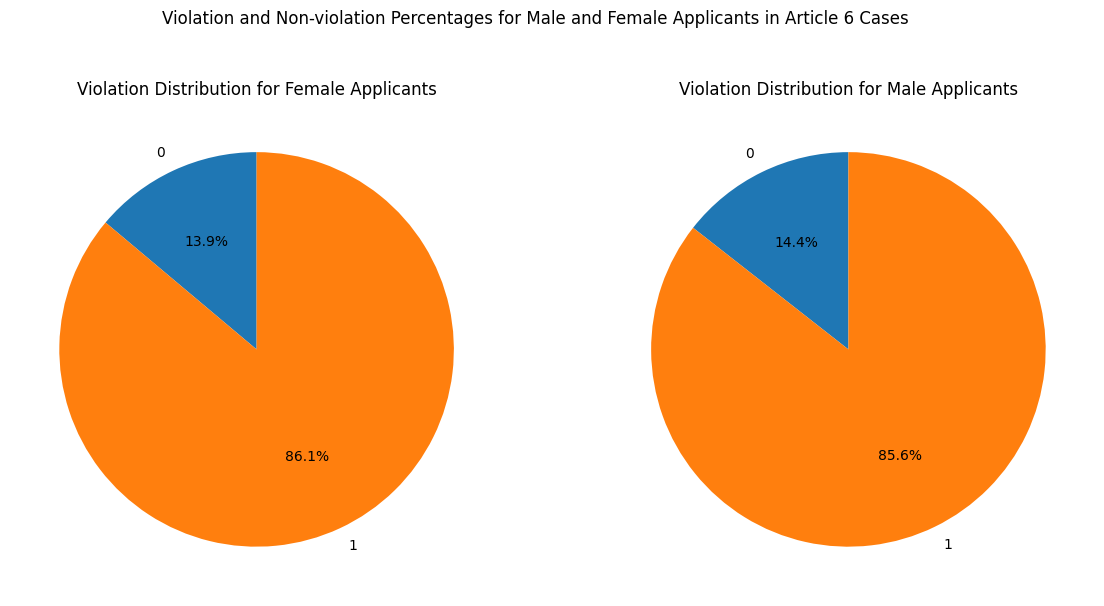

In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import re

# Load the ECHR dataset
dataset = load_dataset("glnmario/ECHR")

# Convert all splits to pandas DataFrames and concatenate them
df_list = [pd.DataFrame(dataset[split]) for split in dataset.keys()]
df = pd.concat(df_list, ignore_index=True)

# Define the regex pattern for variations of Article 6
pattern = re.compile(r'\b(?:article|art|articles|arts|Articles|Arts)\.? ?6\b', re.IGNORECASE)

# Filter rows where the relevant column contains variations of 'Art. 6'
art_6_cases = df[df['conclusion'].str.contains(pattern, na=False)]

# Extract the first 10 sentences for gender labeling
def extract_relevant_text(text):
    sentences = text.split('.')
    first_10_sentences = sentences[:10]
    text_to_analyze = '. '.join([sentence.strip() for sentence in first_10_sentences if sentence.strip()])
    return text_to_analyze

# Apply the function to extract relevant text
art_6_cases['relevant_text'] = art_6_cases['text'].apply(extract_relevant_text)

# Drop rows with empty 'relevant_text'
art_6_cases = art_6_cases[art_6_cases['relevant_text'].str.strip().astype(bool)]

# Enhanced heuristic for labeling gender based on term frequency of pronouns and titles
def label_gender(text):
    text = text.lower()
    female_indicators = [' she ', ' her ', ' mrs. ', ' ms. ']
    male_indicators = [' he ', ' his ', ' him ', ' mr. ']

    female_count = sum(text.count(indicator) for indicator in female_indicators)
    male_count = sum(text.count(indicator) for indicator in male_indicators)

    if male_count > female_count:
        return 'Male'
    elif female_count > male_count:
        return 'Female'
    else:
        return 'Unknown'

# Apply the heuristic to create labels
art_6_cases['gender'] = art_6_cases['relevant_text'].apply(label_gender)

# Count the number of violations and non-violations for male and female
gender_violation_counts = art_6_cases.groupby(['gender', 'binary_judgement']).size().unstack(fill_value=0)

# Calculate percentages
gender_violation_percentages = gender_violation_counts.div(gender_violation_counts.sum(axis=1), axis=0) * 100

# Plot pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for ax, gender in zip(axes, gender_violation_counts.index):
    ax.pie(gender_violation_percentages.loc[gender], labels=gender_violation_percentages.columns, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Violation Distribution for {gender} Applicants')

plt.suptitle('Violation and Non-violation Percentages for Male and Female Applicants in Article 6 Cases')
plt.show()


Code 2 uses machine-predicted gender and converts the binary_judgement for a more readable output to count the violations/non-violations.

In [ ]:
import pandas as pd
import re
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the ECHR dataset
dataset = load_dataset("glnmario/ECHR")

# Convert all splits to pandas DataFrames and concatenate them
df_list = [pd.DataFrame(dataset[split]) for split in dataset.keys()]
df = pd.concat(df_list, ignore_index=True)

# Define the regex pattern for variations of Article 6
pattern = re.compile(r'\b(?:article|art|articles|arts|Articles|Arts)\.? ?6\b', re.IGNORECASE)

# Filter rows where the relevant column contains variations of 'Art. 6'
art_6_cases = df[df['conclusion'].str.contains(pattern, na=False)]

# Extract the first 10 sentences for gender labeling
def extract_relevant_text(text):
    sentences = text.split('.')
    first_10_sentences = sentences[:10]
    text_to_analyze = '. '.join([sentence.strip() for sentence in first_10_sentences if sentence.strip()])
    return text_to_analyze

# Apply the function to extract relevant text
art_6_cases['relevant_text'] = art_6_cases['text'].apply(extract_relevant_text)

# Drop rows with empty 'relevant_text'
art_6_cases = art_6_cases[art_6_cases['relevant_text'].str.strip().astype(bool)]

# Enhanced heuristic for labeling gender based on term frequency of pronouns and titles
def label_gender(text):
    text = text.lower()
    female_indicators = [' she ', ' her ', ' mrs. ', ' ms. ']
    male_indicators = [' he ', ' his ', ' him ', ' mr. ']

    female_count = sum(text.count(indicator) for indicator in female_indicators)
    male_count = sum(text.count(indicator) for indicator in male_indicators)

    if male_count > female_count:
        return 'Male'
    elif female_count > male_count:
        return 'Female'
    else:
        return 'Unknown'

# Apply the heuristic to create labels
art_6_cases['gender'] = art_6_cases['relevant_text'].apply(label_gender)

# Extract features and labels
X = art_6_cases['relevant_text']
y = art_6_cases['gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_tfidf)

# Print classification report
print(classification_report(y_test, y_pred))

# Predict the gender of applicants in the original Art. 6 cases
art_6_cases['gender_prediction'] = rf_classifier.predict(tfidf_vectorizer.transform(art_6_cases['relevant_text']))

# Count and display gender prediction distribution
gender_distribution = art_6_cases['gender_prediction'].value_counts()
print("Gender Distribution of Applicants in Article 6 Cases:")
print(gender_distribution)

# Count the number of violations and non-violations for male and female
gender_violation_counts = art_6_cases.groupby(['gender', 'binary_judgement']).size().unstack(fill_value=0)
print("Number of Violations and Non-Violations for Male and Female:")
print(gender_violation_counts)


<ipython-input-9-5231389155be>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_6_cases['relevant_text'] = art_6_cases['text'].apply(extract_relevant_text)


              precision    recall  f1-score   support

      Female       0.99      0.63      0.77       123
        Male       0.82      0.96      0.88       379
     Unknown       0.88      0.81      0.84       242

    accuracy                           0.85       744
   macro avg       0.90      0.80      0.83       744
weighted avg       0.87      0.85      0.85       744

Gender Distribution of Applicants in Article 6 Cases:
gender_prediction
Male       1992
Unknown    1207
Female      517
Name: count, dtype: int64
Number of Violations and Non-Violations for Male and Female:
binary_judgement    0     1
gender                     
Female             78   484
Male              278  1649
Unknown           127  1100


<ipython-input-10-a2102db779f7>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_6_cases['relevant_text'] = art_6_cases['text'].apply(extract_relevant_text)


              precision    recall  f1-score   support

      Female       0.99      0.63      0.77       123
        Male       0.82      0.96      0.88       379
     Unknown       0.88      0.81      0.84       242

    accuracy                           0.85       744
   macro avg       0.90      0.80      0.83       744
weighted avg       0.87      0.85      0.85       744



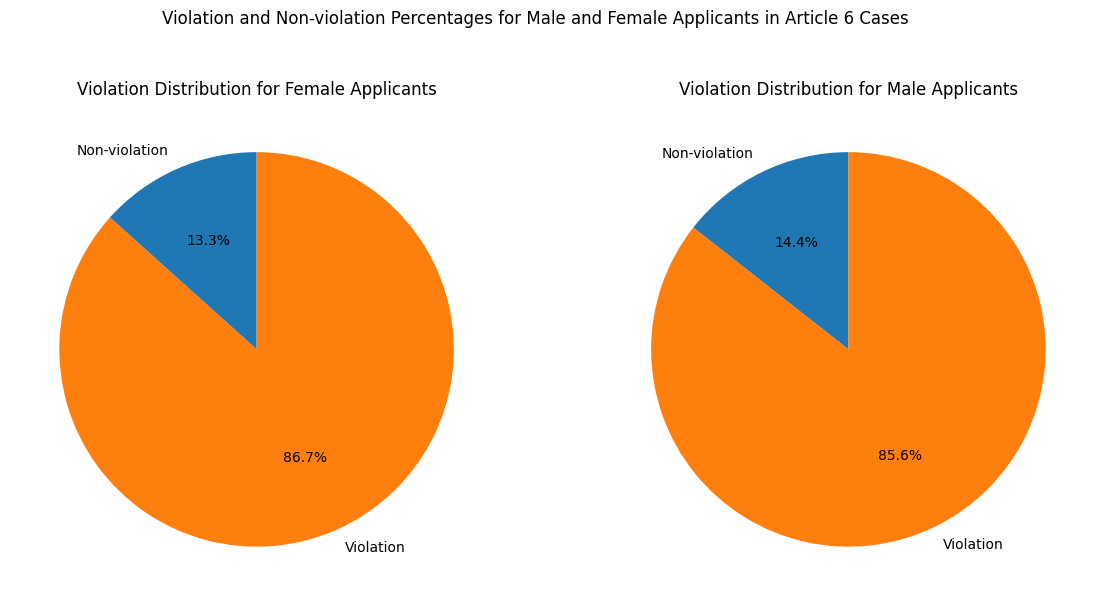

In [ ]:
import pandas as pd
import re
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the ECHR dataset
dataset = load_dataset("glnmario/ECHR")

# Convert all splits to pandas DataFrames and concatenate them
df_list = [pd.DataFrame(dataset[split]) for split in dataset.keys()]
df = pd.concat(df_list, ignore_index=True)

# Define the regex pattern for variations of Article 6
pattern = re.compile(r'\b(?:article|art|articles|arts|Articles|Arts)\.? ?6\b', re.IGNORECASE)

# Filter rows where the relevant column contains variations of 'Art. 6'
art_6_cases = df[df['conclusion'].str.contains(pattern, na=False)]

# Extract the first 10 sentences for gender labeling
def extract_relevant_text(text):
    sentences = text.split('.')
    first_10_sentences = sentences[:10]
    text_to_analyze = '. '.join([sentence.strip() for sentence in first_10_sentences if sentence.strip()])
    return text_to_analyze

# Apply the function to extract relevant text
art_6_cases['relevant_text'] = art_6_cases['text'].apply(extract_relevant_text)

# Drop rows with empty 'relevant_text'
art_6_cases = art_6_cases[art_6_cases['relevant_text'].str.strip().astype(bool)]

# Enhanced heuristic for labeling gender based on term frequency of pronouns and titles
def label_gender(text):
    text = text.lower()
    female_indicators = [' she ', ' her ', ' mrs. ', ' ms. ']
    male_indicators = [' he ', ' his ', ' him ', ' mr. ']

    female_count = sum(text.count(indicator) for indicator in female_indicators)
    male_count = sum(text.count(indicator) for indicator in male_indicators)

    if male_count > female_count:
        return 'Male'
    elif female_count > male_count:
        return 'Female'
    else:
        return 'Unknown'

# Apply the heuristic to create labels
art_6_cases['gender'] = art_6_cases['relevant_text'].apply(label_gender)

# Extract features and labels
X = art_6_cases['relevant_text']
y = art_6_cases['gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_tfidf)

# Print classification report
print(classification_report(y_test, y_pred))

# Predict the gender of applicants in the original Art. 6 cases
art_6_cases['gender_prediction'] = rf_classifier.predict(tfidf_vectorizer.transform(art_6_cases['relevant_text']))

# Convert binary judgement to 'Violation' or 'Non-violation'
def classify_violation(binary_judgement):
    return 'Violation' if binary_judgement == 1 else 'Non-violation'

# Apply the function to classify violations
art_6_cases['violation_status'] = art_6_cases['binary_judgement'].apply(classify_violation)

# Count violations and non-violations for each predicted gender
violation_counts = art_6_cases.groupby(['gender_prediction', 'violation_status']).size().unstack(fill_value=0)

# Calculate percentages
violation_percentages = violation_counts.div(violation_counts.sum(axis=1), axis=0) * 100

# Plot pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for ax, gender in zip(axes, violation_counts.index):
    ax.pie(violation_percentages.loc[gender], labels=violation_percentages.columns, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Violation Distribution for {gender} Applicants')

plt.suptitle('Violation and Non-violation Percentages for Male and Female Applicants in Article 6 Cases')
plt.show()


**Support vector machine**: (Classifying the gender of the applicant as male, female or unknown. Classification is based on the first 10 sentences of the text column and the frequency of the indicators for the gender.) Result: Gender distibution in Art. 6 cases

In [ ]:
import pandas as pd
import re
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the ECHR dataset
dataset = load_dataset("glnmario/ECHR")

# Convert all splits to pandas DataFrames and concatenate them
df_list = [pd.DataFrame(dataset[split]) for split in dataset.keys()]
df = pd.concat(df_list, ignore_index=True)

# Define the regex pattern for variations of Article 6
pattern = re.compile(r'\b(?:article|art|articles|arts|Articles|Arts)\.? ?6\b', re.IGNORECASE)

# Filter rows where the relevant column contains variations of 'Art. 6'
art_6_cases = df[df['conclusion'].str.contains(pattern, na=False)]

# Extract the first 10 sentences starting with "The Applicant" for gender labeling
def extract_relevant_text(text):
    sentences = [sentence.strip() for sentence in text.split('.') if sentence.strip()]
    first_10_sentences = '. '.join(sentences[:10])
    return first_10_sentences

# Apply the function to extract relevant text
art_6_cases['relevant_text'] = art_6_cases['text'].apply(extract_relevant_text)

# Drop rows with empty 'relevant_text'
art_6_cases = art_6_cases[art_6_cases['relevant_text'].str.strip().astype(bool)]

# Enhanced heuristic for labeling gender based on term frequency of indicators
def label_gender(text):
    text = text.lower()
    male_indicators = [' he ', ' his ', ' him ', ' mr. ']
    female_indicators = [' she ', ' her ', ' mrs. ', ' ms. ']

    male_count = sum(text.count(indicator) for indicator in male_indicators)
    female_count = sum(text.count(indicator) for indicator in female_indicators)

    if male_count > female_count:
        return 'Male'
    elif female_count > male_count:
        return 'Female'
    else:
        return 'Unknown'

# Apply the heuristic to create labels
art_6_cases['gender'] = art_6_cases['relevant_text'].apply(label_gender)

# Extract features and labels
X = art_6_cases['relevant_text']
y = art_6_cases['gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_tfidf)

# Print classification report
print(classification_report(y_test, y_pred))

# Predict the gender of applicants in the original Art. 6 cases
art_6_cases['gender_prediction'] = svm_classifier.predict(tfidf_vectorizer.transform(art_6_cases['relevant_text']))

# Count and display gender prediction distribution
gender_distribution = art_6_cases['gender_prediction'].value_counts()
print("Gender Distribution of Applicants in Article 6 Cases:")
print(gender_distribution)

# Count violations and non-violations for male and female
violation_counts = art_6_cases.groupby(['gender', 'binary_judgement']).size().unstack(fill_value=0)
violation_counts.columns = ['Non-Violation', 'Violation']

print("Violation Counts by Gender:")
print(violation_counts)


<ipython-input-11-99c06abd5cae>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_6_cases['relevant_text'] = art_6_cases['text'].apply(extract_relevant_text)


              precision    recall  f1-score   support

      Female       0.94      0.83      0.88       123
        Male       0.92      0.91      0.92       379
     Unknown       0.81      0.87      0.84       242

    accuracy                           0.89       744
   macro avg       0.89      0.87      0.88       744
weighted avg       0.89      0.89      0.89       744

Gender Distribution of Applicants in Article 6 Cases:
gender_prediction
Male       1925
Unknown    1244
Female      547
Name: count, dtype: int64
Violation Counts by Gender:
         Non-Violation  Violation
gender                           
Female              78        484
Male               278       1651
Unknown            127       1098


<ipython-input-13-d61472edcb78>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_6_cases['relevant_text'] = art_6_cases['text'].apply(extract_relevant_text)



Percentage of Violations and Non-Violations by Gender:
         Non-Violation (%)  Violation (%)
gender                                   
Female           13.879004      86.120996
Male             14.411612      85.588388
Unknown          10.367347      89.632653


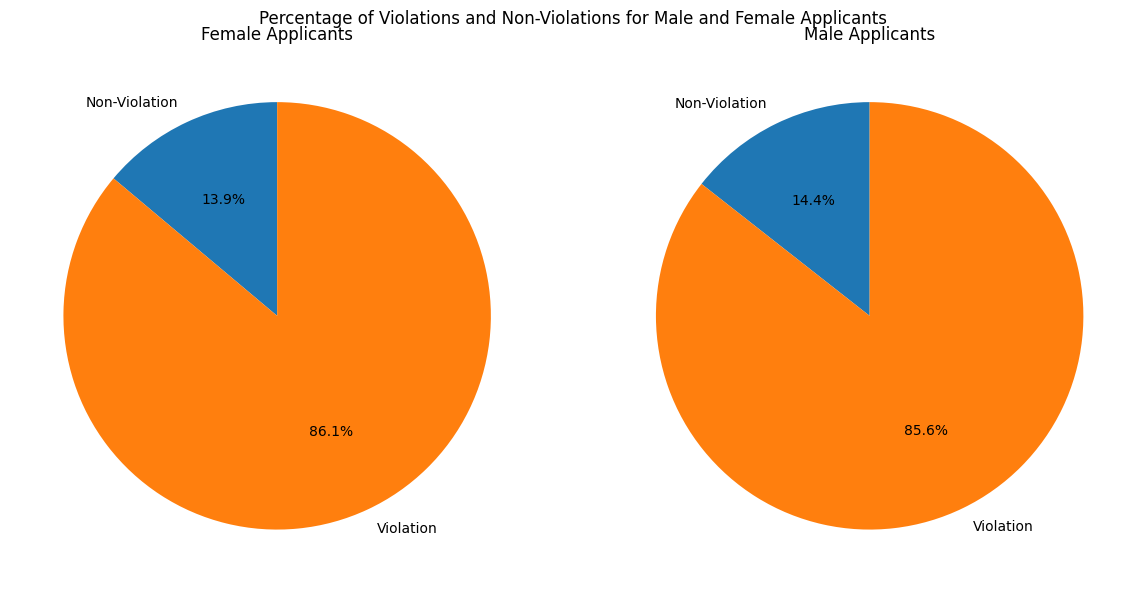

In [ ]:
import pandas as pd
import re
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the ECHR dataset
dataset = load_dataset("glnmario/ECHR")

# Convert all splits to pandas DataFrames and concatenate them
df_list = [pd.DataFrame(dataset[split]) for split in dataset.keys()]
df = pd.concat(df_list, ignore_index=True)

# Define the regex pattern for variations of Article 6
pattern = re.compile(r'\b(?:article|art|articles|arts|Articles|Arts)\.? ?6\b', re.IGNORECASE)

# Filter rows where the relevant column contains variations of 'Art. 6'
art_6_cases = df[df['conclusion'].str.contains(pattern, na=False)]

# Extract the first 10 sentences starting with "The Applicant" for gender labeling
def extract_relevant_text(text):
    sentences = [sentence.strip() for sentence in text.split('.') if sentence.strip()]
    first_10_sentences = '. '.join(sentences[:10])
    return first_10_sentences

# Apply the function to extract relevant text
art_6_cases['relevant_text'] = art_6_cases['text'].apply(extract_relevant_text)

# Drop rows with empty 'relevant_text'
art_6_cases = art_6_cases[art_6_cases['relevant_text'].str.strip().astype(bool)]

# Enhanced heuristic for labeling gender based on term frequency of indicators
def label_gender(text):
    text = text.lower()
    male_indicators = [' he ', ' his ', ' him ', ' mr. ']
    female_indicators = [' she ', ' her ', ' mrs. ', ' ms. ']

    male_count = sum(text.count(indicator) for indicator in male_indicators)
    female_count = sum(text.count(indicator) for indicator in female_indicators)

    if male_count > female_count:
        return 'Male'
    elif female_count > male_count:
        return 'Female'
    else:
        return 'Unknown'

# Apply the heuristic to create labels
art_6_cases['gender'] = art_6_cases['relevant_text'].apply(label_gender)

# Extract features and labels
X = art_6_cases['relevant_text']
y = art_6_cases['gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_tfidf)

# Predict the gender of applicants in the original Art. 6 cases
art_6_cases['gender_prediction'] = svm_classifier.predict(tfidf_vectorizer.transform(art_6_cases['relevant_text']))

# Count violations and non-violations for male and female
violation_counts = art_6_cases.groupby(['gender', 'binary_judgement']).size().unstack(fill_value=0)
violation_counts.columns = ['Non-Violation', 'Violation']

# Calculate percentages
violation_counts['Total'] = violation_counts.sum(axis=1)
violation_counts['Non-Violation (%)'] = violation_counts['Non-Violation'] / violation_counts['Total'] * 100
violation_counts['Violation (%)'] = violation_counts['Violation'] / violation_counts['Total'] * 100

# Print percentage of violations and non-violations by gender
print("\nPercentage of Violations and Non-Violations by Gender:")
print(violation_counts[['Non-Violation (%)', 'Violation (%)']])

# Create pie charts for each gender
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Female cases
female_violation_counts = violation_counts.loc['Female', ['Non-Violation', 'Violation']]
ax1.pie(female_violation_counts, labels=female_violation_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Female Applicants')

# Male cases
male_violation_counts = violation_counts.loc['Male', ['Non-Violation', 'Violation']]
ax2.pie(male_violation_counts, labels=male_violation_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Male Applicants')

plt.suptitle('Percentage of Violations and Non-Violations for Male and Female Applicants')
plt.tight_layout()
plt.show()


**LLM API Integration** - this involves making API calls to the LLM service from within your Python code to generate text, answer questions, or perform other natural language processing tasks.

This model was used: gpt-3.5-turbo-16k.


In [ ]:
from openai import OpenAI
import os
import json
import time
from collections import Counter
import pickle
import matplotlib.pyplot as plt
import numpy as np

client = OpenAI()

def load_dataset(file_path):
    dataset = []
    with open(file_path, 'r') as f:
        for line in f:
            try:
                entry = json.loads(line)
                text = entry.get('text', '')
                binary_judgment = entry.get('binary_judgement', None)
                if text and binary_judgment is not None:
                    dataset.append((text, binary_judgment))
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON: {e}")
    return dataset

def classify_applicants_batch(texts, batch_size=10, max_chars=300):
    classifications = []
    for i in range(0, len(texts), batch_size):
        batch = [text[0] for text in texts[i:i+batch_size]]
        truncated_batch = [text[:max_chars] for text in batch]

        prompt = ("Classify each of the following texts as 'man', 'woman', or 'unknown/other' based on pronouns used to describe the applicant. "
                  "Classify a text as 'unknown/other' if there are multiple applicants or if the applicant is a legal person:\n\n")
        for j, text in enumerate(truncated_batch, 1):
            prompt += f"Text {j}:\n{text}\n\n"
        prompt += "Provide classifications in the following format:\nText 1: classification\nText 2: classification\n..."

        retry_count = 0
        while retry_count < 3:
            try:
                response = client.chat.completions.create(
                    model="gpt-3.5-turbo-16k",
                    messages=[
                        {"role": "system", "content": "You are a helpful assistant."},
                        {"role": "user", "content": prompt}
                    ],
                    max_tokens=500,
                    n=1,
                    temperature=0.5
                )
                result = response.choices[0].message.content.strip()
                batch_classifications = [line.split(': ')[1].lower() if ': ' in line else 'unknown/other' for line in result.split('\n') if line]
                if len(batch_classifications) != len(batch):
                    raise ValueError("Mismatch in number of classifications")
                classifications.extend(batch_classifications)
                print(f"Processed batch {i//batch_size + 1}/{len(texts)//batch_size + 1}")
                break
            except Exception as e:
                print(f"Error in API call: {e}")
                retry_count += 1
                time.sleep(5)  # Wait longer before retrying

        if retry_count == 3:
            classifications.extend(["unknown/other"] * len(batch))

        # Save progress
        with open('classification_progress.pkl', 'wb') as f:
            pickle.dump(classifications, f)

        time.sleep(2)  # Delay between batches

    return classifications

def print_classification_counts(classifications):
    counter = Counter(classifications)
    total = len(classifications)
    print("\nClassification Counts:")
    print(f"Total cases: {total}")
    print(f"Male applicants: {counter['man']} ({counter['man']/total*100:.2f}%)")
    print(f"Female applicants: {counter['woman']} ({counter['woman']/total*100:.2f}%)")
    print(f"Unknown/Other: {counter['unknown/other']} ({counter['unknown/other']/total*100:.2f}%)")

def analyze_results(combined_data):
    total_cases = len(combined_data)
    male_violations = sum(1 for gender, judgment in combined_data if gender == 'man' and judgment == 1)
    female_violations = sum(1 for gender, judgment in combined_data if gender == 'woman' and judgment == 1)
    male_non_violations = sum(1 for gender, judgment in combined_data if gender == 'man' and judgment == 0)
    female_non_violations = sum(1 for gender, judgment in combined_data if gender == 'woman' and judgment == 0)

    print("\nAnalysis Results:")
    print(f"Total cases analyzed: {total_cases}")
    print(f"Male applicants with violations: {male_violations}")
    print(f"Male applicants without violations: {male_non_violations}")
    print(f"Female applicants with violations: {female_violations}")
    print(f"Female applicants without violations: {female_non_violations}")

    total_male = male_violations + male_non_violations
    total_female = female_violations + female_non_violations

    male_violation_percentage = female_violation_percentage = 0
    if total_male > 0:
        male_violation_percentage = male_violations/total_male*100
        print(f"\nPercentage of male applicant cases with violations: {male_violation_percentage:.2f}%")
    if total_female > 0:
        female_violation_percentage = female_violations/total_female*100
        print(f"Percentage of female applicant cases with violations: {female_violation_percentage:.2f}%")

    return male_violations, male_non_violations, female_violations, female_non_violations, male_violation_percentage, female_violation_percentage

def plot_results(male_violations, male_non_violations, female_violations, female_non_violations, male_violation_percentage, female_violation_percentage):
    categories = ['Male', 'Female']
    violations = [male_violations, female_violations]
    non_violations = [male_non_violations, female_non_violations]

    fig, ax = plt.subplots(figsize=(12, 8))

    bar_width = 0.35
    index = np.arange(len(categories))

    p1 = ax.bar(index, violations, bar_width, label='Violations')
    p2 = ax.bar(index, non_violations, bar_width, bottom=violations, label='Non-violations')

    ax.set_ylabel('Number of Cases')
    ax.set_title('Violations and Non-violations by Gender', fontsize=16)
    ax.set_xticks(index)
    ax.set_xticklabels(categories)
    ax.legend()

    for i, v in enumerate(violations):
        ax.text(i, v/2, str(v), ha='center', va='center')
        ax.text(i, v+non_violations[i]/2, str(non_violations[i]), ha='center', va='center')

    ax.text(-0.5, -150, f"Percentage of male applicant cases with violations: {male_violation_percentage:.2f}%", ha='left', va='bottom')
    ax.text(-0.5, -200, f"Percentage of female applicant cases with violations: {female_violation_percentage:.2f}%", ha='left', va='bottom')

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)
    plt.show()

# Main execution
dataset = load_dataset('article_6_cases.json')

print("Starting classification process...")
start_time = time.time()

# Check for existing progress
if os.path.exists('classification_progress.pkl'):
    with open('classification_progress.pkl', 'rb') as f:
        gender_classifications = pickle.load(f)
    print(f"Loaded {len(gender_classifications)} existing classifications")
    remaining_texts = dataset[len(gender_classifications):]
else:
    gender_classifications = []
    remaining_texts = dataset

gender_classifications.extend(classify_applicants_batch(remaining_texts))

end_time = time.time()
print(f"Classification completed in {(end_time - start_time) / 60:.2f} minutes")

# Print classification counts
print_classification_counts(gender_classifications)

# Combine gender classifications with binary judgments
combined_data = list(zip(gender_classifications, [judgment for _, judgment in dataset]))

# Analyze results
male_violations, male_non_violations, female_violations, female_non_violations, male_violation_percentage, female_violation_percentage = analyze_results(combined_data)

# Plot results
plot_results(male_violations, male_non_violations, female_violations, female_non_violations, male_violation_percentage, female_violation_percentage)

print("\nClassification, analysis, and visualization complete.")

The results:

Classification Counts:

Total cases: 3716

Male applicants: 1316 (35.41%)

Female applicants: 475 (12.78%)

Unknown/Other: 1918 (51.61%)

Analysis Results:

Total cases analyzed: 3716

Male applicants with violations: 1125

Male applicants without violations: 191

Female applicants with violations: 408

Female applicants without violations: 67

Percentage of male applicant cases with violations: 85.49%

Percentage of female applicant cases with violations: 85.89%

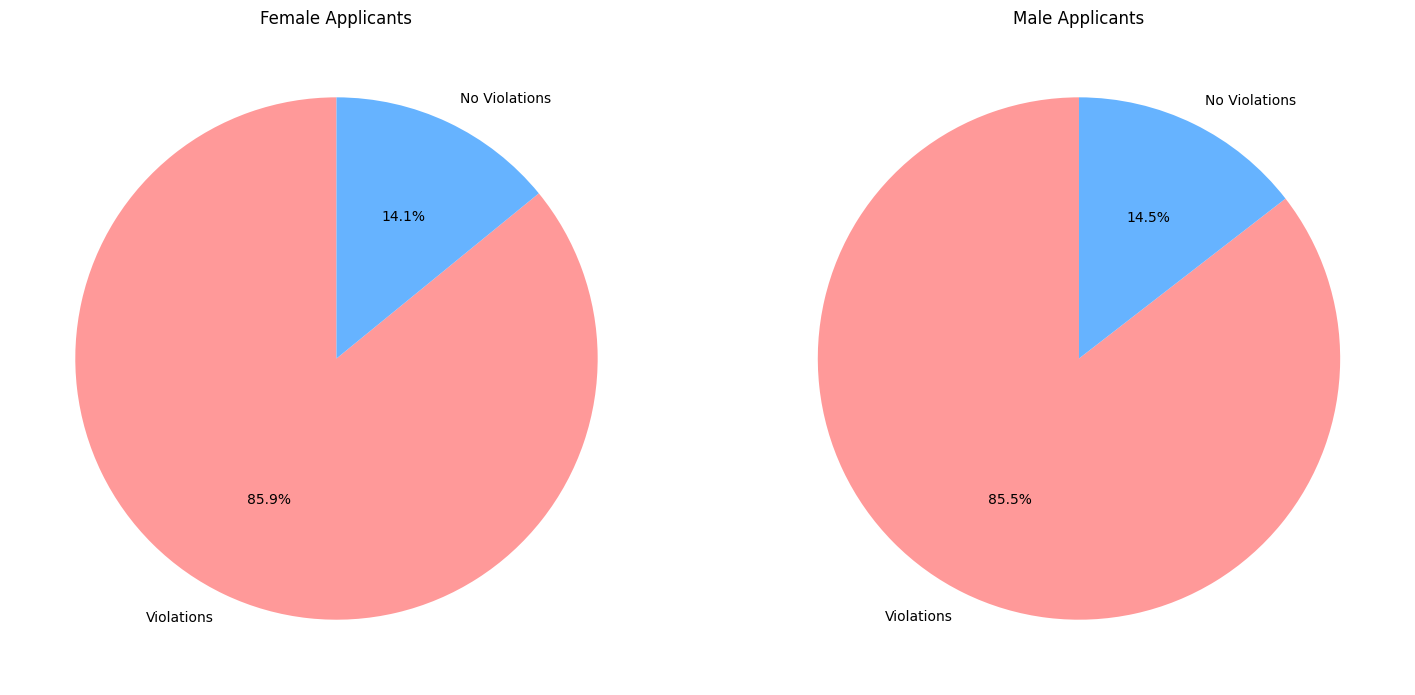

In [ ]:
import matplotlib.pyplot as plt

# Data
female_data = [408, 67]  # [violations, non-violations]
male_data = [1125, 191]  # [violations, non-violations]

labels = ['Violations', 'No Violations']
colors = ['#ff9999', '#66b3ff']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Female applicants pie chart
ax1.pie(female_data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Female Applicants')

# Male applicants pie chart
ax2.pie(male_data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('Male Applicants')

# Adjust layout and display
plt.tight_layout()
plt.show()